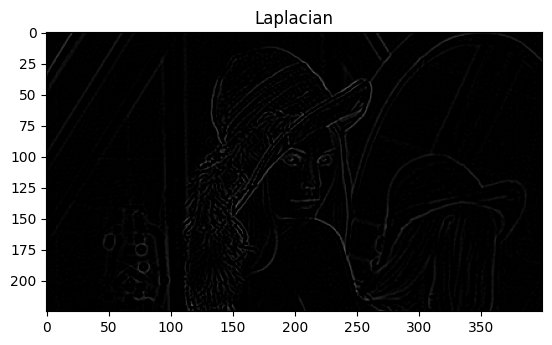

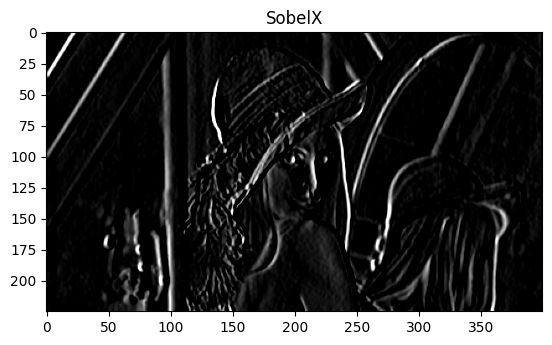

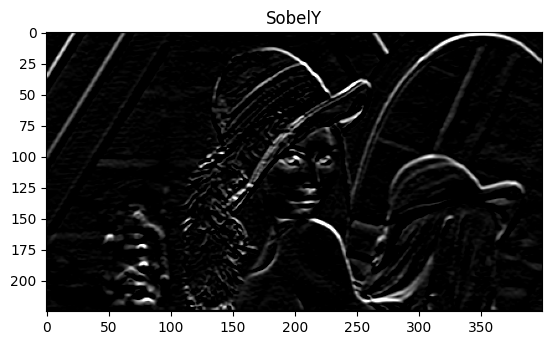

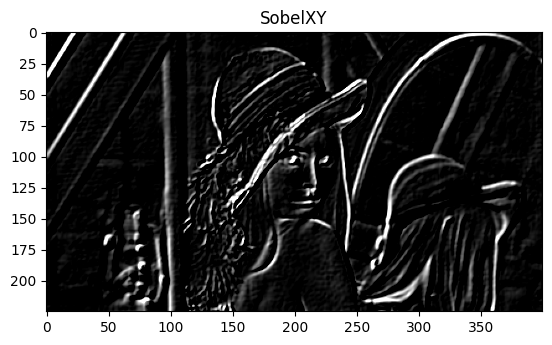

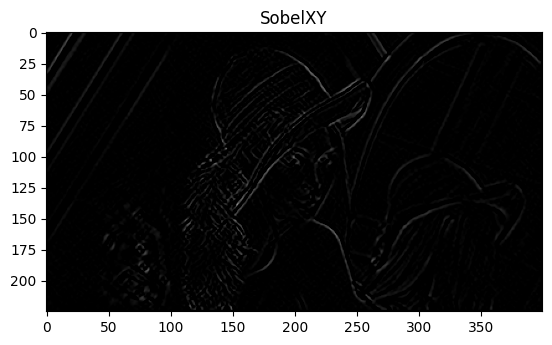

In [12]:
# EDGE DETECTORS

import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread("images/lena.jpg")

imgGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)

img_Gaussian = cv2.GaussianBlur(imgGray, (3,3),0)



#LAPLACIAN
laplacian = cv2.Laplacian(img_Gaussian, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
plt.title('Laplacian')
plt.show()

#SOBELX
sobelX = cv2.Sobel(img_Gaussian, cv2.CV_64F, 1, 0, ksize=3)
plt.imshow(sobelX, cmap='gray', vmin=0, vmax=255)
plt.title('SobelX')
plt.show()

#SOBELY
sobelY = cv2.Sobel(img_Gaussian, cv2.CV_64F, 0, 1, ksize=3)
plt.imshow(sobelY, cmap='gray', vmin=0, vmax=255)
plt.title('SobelY')
plt.show()

sobelXY = sobelX+sobelY
plt.imshow(sobelXY, cmap='gray', vmin=0, vmax=255)
plt.title('SobelXY')
plt.show()

sobelXY_V2 = cv2.Sobel(img_Gaussian, cv2.CV_64F, 1, 1, ksize=3)
plt.imshow(sobelXY_V2, cmap='gray', vmin=0, vmax=255)
plt.title('SobelXY')
plt.show()

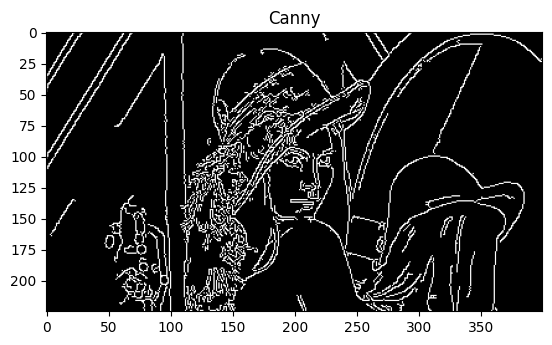

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread("images/lena.jpg")
imgGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)


imgCanny = cv2.Canny(imgGray, 80, 180)

plt.imshow(imgCanny, cmap='gray', vmin=0, vmax=255)
plt.title('Canny')
plt.show()

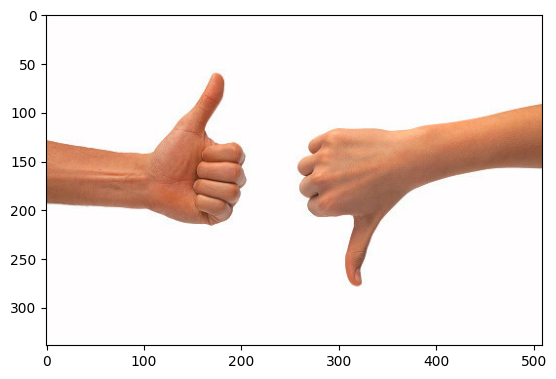

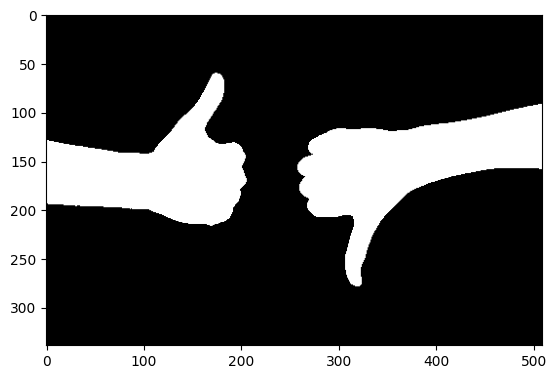

2
(array([[[505,  92]],

       [[504,  93]],

       [[500,  93]],

       [[499,  94]],

       [[494,  94]],

       [[493,  95]],

       [[490,  95]],

       [[489,  96]],

       [[485,  96]],

       [[484,  97]],

       [[480,  97]],

       [[479,  98]],

       [[476,  98]],

       [[475,  99]],

       [[472,  99]],

       [[471, 100]],

       [[468, 100]],

       [[467, 101]],

       [[464, 101]],

       [[463, 102]],

       [[460, 102]],

       [[459, 103]],

       [[456, 103]],

       [[455, 104]],

       [[452, 104]],

       [[451, 105]],

       [[447, 105]],

       [[446, 106]],

       [[442, 106]],

       [[441, 107]],

       [[437, 107]],

       [[436, 108]],

       [[432, 108]],

       [[431, 109]],

       [[426, 109]],

       [[425, 110]],

       [[420, 110]],

       [[419, 111]],

       [[413, 111]],

       [[412, 112]],

       [[403, 112]],

       [[402, 113]],

       [[395, 113]],

       [[394, 114]],

       [[388, 114]],

       

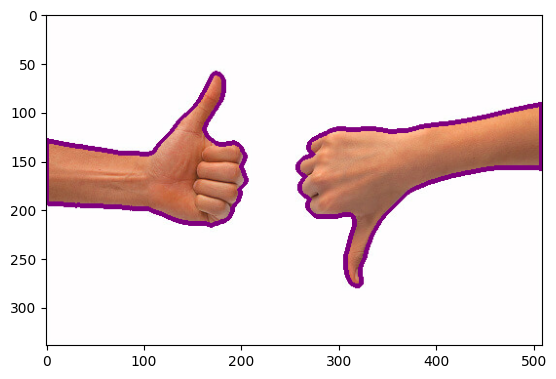

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread("../img/thumbs_up_down.jpg")
imgGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imgRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

# Important! Invert when using contour detection because
# in Contour detection, 0 is background, 1 is foreground.
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY)
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.show()

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Returned contours is a Tuple, not an image

print(len(contours))
print(contours)

result = imgRGB.copy()
cv2.drawContours(result, contours, -1, (127,0,127), 3)
plt.imshow(result)
plt.show()

Complete pipeline for contour detection with, including morphology step

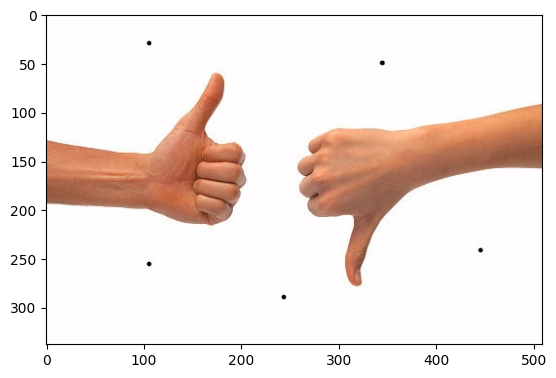

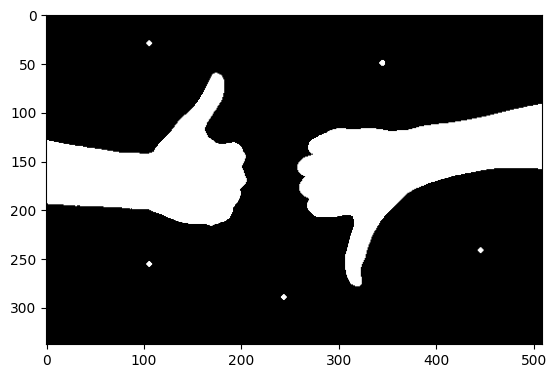

2


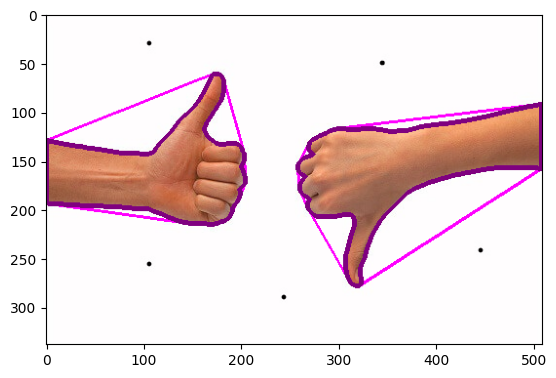

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread("../img/noise_out_thumbs_up_down.jpg")
imgGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imgRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

# Important! Invert when using contour detection because
# in Contour detection, 0 is background, 1 is foreground.
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY)
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Returned contours is a Tuple, not an image

print(len(contours))
# print(contours)

result = imgRGB.copy()
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(result, [hull], 0, (255,0,255), 2)

# cv2.drawContours(result, contours, -1, (127,0,127), 3)
plt.imshow(result)
plt.show()

Contour Features... Finding centroid and area of a contour polygon

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread("../img/noise_out_thumbs_up_down.jpg")
imgGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imgRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()

# Important! Invert when using contour detection because
# in Contour detection, 0 is background, 1 is foreground.
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY)
_, binary = cv2.threshold(imgGray, 220, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Returned contours is a Tuple, not an image

print(len(contours))
# print(contours)

result = imgRGB.copy()
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(result, [hull], 0, (255,0,255), 2)

# cv2.drawContours(result, contours, -1, (127,0,127), 3)
plt.imshow(result)
plt.show()